In [9]:
import pandas as pd

df = pd.read_csv('qrv.csv', encoding="ISO-8859-1")

# Display the DataFrame
print(df.columns)

df


Index(['Level', 'Key', 'System', 'Subsystem', 'Part Number', 'Part Title',
       'Parent', 'Responsible Engineer', 'Procurement Code',
       'Sub Component Code', 'Variant'],
      dtype='object')


,Level,Key,System,Subsystem,Part Number,Part Title,Parent,Responsible Engineer,Procurement Code,Sub Component Code,Variant
0,1,EV00004608,BODY,NaN,EV00004608,QR Vehicle,NaN,Rachel Green,Phantom,NaN,QRV: Car Type{Venti}
1,2,EV00004608-SY00002272,BODY,NaN,SY00002272,BODY,EV00004608,Rachel Green,Phantom,NaN,QRV: Car Type{Venti}
2,3,EV00004608-SY00002272-SB00007686,BODY,STRUCTURE,SB00007686,STRUCTURE,SY00002272,Rachel Green,Phantom,NaN,QRV: Car Type{Venti}
3,4,EV00004608-SY00002272-SB00007686-GP00005889,BODY,STRUCTURE,GP00005889,SEALS,SB00007686,Rachel Green,Phantom,NaN,QRV: Car Type{Venti}
4,5,EV00004608-SY00002272-SB00007686-GP00005889-CA...,BODY,STRUCTURE,CAY00010323,BODY STORE SEALANT,GP00005889,Pheobe Buffay,Phantom,NaN,QRV: Car Type{Venti}
...,...,...,...,...,...,...,...,...,...,...,...
69380,9,EV00004608-SY00005795-SB00003830-GP00009740-SB...,BATTERY PACK,BATTERY,SC00013805,Foam 607P,PT01597040,Duke Weaselton,Buy,NaN,"QRV: Battery{LMAO 5 Module,LMAO 190 Module}"
69381,8,EV00004608-SY00005795-SB00003830-GP00009740-SB...,BATTERY PACK,BATTERY,PT01759813,TOUCH COVER; NEGATIVE - LARGE,PT01759805,Swagman,Make,NaN,"QRV: Battery{LMAO 5 Module,LMAO 190 Module}"
69382,8,EV00004608-SY00005795-SB00003830-GP00009740-SB...,BATTERY PACK,BATTERY,PT01759815,TOUCH COVER; POSITIVE - LARGE,PT01759805,Swagman,Buy,NaN,"QRV: Battery{LMAO 5 Module,LMAO 190 Module}"
69383,8,EV00004608-SY00005795-SB00003830-GP00009740-SB...,BATTERY PACK,BATTERY,PT00052426,SHEAR WALL; 3BOLT,PT01759805,Judy Hopps,Buy,NaN,"QRV: Battery{LMAO 5 Module,LMAO 190 Module}"


In [11]:
filtered_rows = []
count = 0
for _, row in df.iterrows():
    part_number = row['Part Number']
    parent_part = row['Parent']
    
    # Check if the parent part has a "Procurement Code" of "Buy" and "Subcomponent Code" is NaN
    parent_row = df[df['Part Number'] == parent_part]
    
    if count % 1000 == 0:
        print(count)
        
        
    if not parent_row.empty:
        parent_procurement_code = parent_row.iloc[0]['Procurement Code']
        parent_subcomponent_code = parent_row.iloc[0]['Sub Component Code']
        
        if parent_procurement_code == 'Buy' and (parent_subcomponent_code == "DirectedBuy" or parent_subcomponent_code == "SupplierBuy"):
            filtered_rows.append(row)
    
    count = count + 1

# Create a new DataFrame from the filtered rows
filtered_df = pd.DataFrame(filtered_rows, columns=df.columns)






0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000


In [13]:
filtered_df

,Level,Key,System,Subsystem,Part Number,Part Title,Parent,Responsible Engineer,Procurement Code,Sub Component Code,Variant
557,8,EV00004608-SY00002272-SB00007686-GP00005889-CA...,BODY,STRUCTURE,SC00012821,Adhesive Type D23,PT00025488,Ross Geller,Buy,NaN,QRV: Car Type{Venti}
558,8,EV00004608-SY00002272-SB00007686-GP00005889-CA...,BODY,STRUCTURE,SC00012821,Adhesive Type D23,PT00025488,Ross Geller,Buy,NaN,QRV: Car Type{Venti}
559,8,EV00004608-SY00002272-SB00007686-GP00005889-CA...,BODY,STRUCTURE,SC00012821,Adhesive Type D23,PT00025488,Ross Geller,Buy,NaN,QRV: Car Type{Venti}
560,8,EV00004608-SY00002272-SB00007686-GP00005889-CA...,BODY,STRUCTURE,SC00012821,Adhesive Type D23,PT00025488,Ross Geller,Buy,NaN,QRV: Car Type{Venti}
561,8,EV00004608-SY00002272-SB00007686-GP00005889-CA...,BODY,STRUCTURE,SC00012821,Adhesive Type D23,PT00025488,Ross Geller,Buy,NaN,QRV: Car Type{Venti}
...,...,...,...,...,...,...,...,...,...,...,...
69319,11,EV00004608-SY00005795-SB00003830-GP00009740-SB...,BATTERY PACK,BATTERY,PT00051311,Motorboat Tail,PT00015975,Dawn Bellwether,Buy,SupplierBuy,"QRV: Battery{LMAO 5 Module,LMAO 190 Module}"
69321,11,EV00004608-SY00005795-SB00003830-GP00009740-SB...,BATTERY PACK,BATTERY,PT00051315,Sour Patch Gummies,PT00015983,Dawn Bellwether,Buy,SupplierBuy,"QRV: Battery{LMAO 5 Module,LMAO 190 Module}"
69323,11,EV00004608-SY00005795-SB00003830-GP00009740-SB...,BATTERY PACK,BATTERY,PT00051311,Motorboat Tail,PT00015975,Dawn Bellwether,Buy,SupplierBuy,"QRV: Battery{LMAO 5 Module,LMAO 190 Module}"
69325,11,EV00004608-SY00005795-SB00003830-GP00009740-SB...,BATTERY PACK,BATTERY,PT00051310,Charge Port BCA,PT00015978,Chief Bogo,Buy,DirectedBuy,"QRV: Battery{LMAO 5 Module,LMAO 190 Module}"


In [15]:
wrong_rows = []

for _, row in filtered_df.iterrows():
    procurement_code = row['Procurement Code']
    subcomponent_code = row['Sub Component Code']
    
    if procurement_code == 'Buy' and (not subcomponent_code == 'DirectedBuy' and not subcomponent_code == 'SupplierBuy'):
        wrong_rows.append(row)
    elif (procurement_code == 'Make'):
        wrong_rows.append(row)
    
wrong_rows_df = pd.DataFrame(wrong_rows, columns=df.columns)

wrong_rows_df

,Level,Key,System,Subsystem,Part Number,Part Title,Parent,Responsible Engineer,Procurement Code,Sub Component Code,Variant
557,8,EV00004608-SY00002272-SB00007686-GP00005889-CA...,BODY,STRUCTURE,SC00012821,Adhesive Type D23,PT00025488,Ross Geller,Buy,NaN,QRV: Car Type{Venti}
558,8,EV00004608-SY00002272-SB00007686-GP00005889-CA...,BODY,STRUCTURE,SC00012821,Adhesive Type D23,PT00025488,Ross Geller,Buy,NaN,QRV: Car Type{Venti}
559,8,EV00004608-SY00002272-SB00007686-GP00005889-CA...,BODY,STRUCTURE,SC00012821,Adhesive Type D23,PT00025488,Ross Geller,Buy,NaN,QRV: Car Type{Venti}
560,8,EV00004608-SY00002272-SB00007686-GP00005889-CA...,BODY,STRUCTURE,SC00012821,Adhesive Type D23,PT00025488,Ross Geller,Buy,NaN,QRV: Car Type{Venti}
561,8,EV00004608-SY00002272-SB00007686-GP00005889-CA...,BODY,STRUCTURE,SC00012821,Adhesive Type D23,PT00025488,Ross Geller,Buy,NaN,QRV: Car Type{Venti}
...,...,...,...,...,...,...,...,...,...,...,...
67289,11,EV00004608-SY00005795-SB00003830-GP00009740-SB...,BATTERY PACK,BATTERY,PT00051313,Friday the 13th,PT00015980,Dawn Bellwether,Make,SupplierBuy,"QRV: Battery{LMAO 5 Module,LMAO 190 Module}"
67820,11,EV00004608-SY00005795-SB00003830-GP00009740-SB...,BATTERY PACK,BATTERY,PT00051313,Friday the 13th,PT00015980,Dawn Bellwether,Make,SupplierBuy,"QRV: Battery{LMAO 5 Module,LMAO 190 Module}"
68301,11,EV00004608-SY00005795-SB00003830-GP00009740-SB...,BATTERY PACK,BATTERY,PT00051313,Friday the 13th,PT00015980,Dawn Bellwether,Make,SupplierBuy,"QRV: Battery{LMAO 5 Module,LMAO 190 Module}"
68832,11,EV00004608-SY00005795-SB00003830-GP00009740-SB...,BATTERY PACK,BATTERY,PT00051313,Friday the 13th,PT00015980,Dawn Bellwether,Make,SupplierBuy,"QRV: Battery{LMAO 5 Module,LMAO 190 Module}"


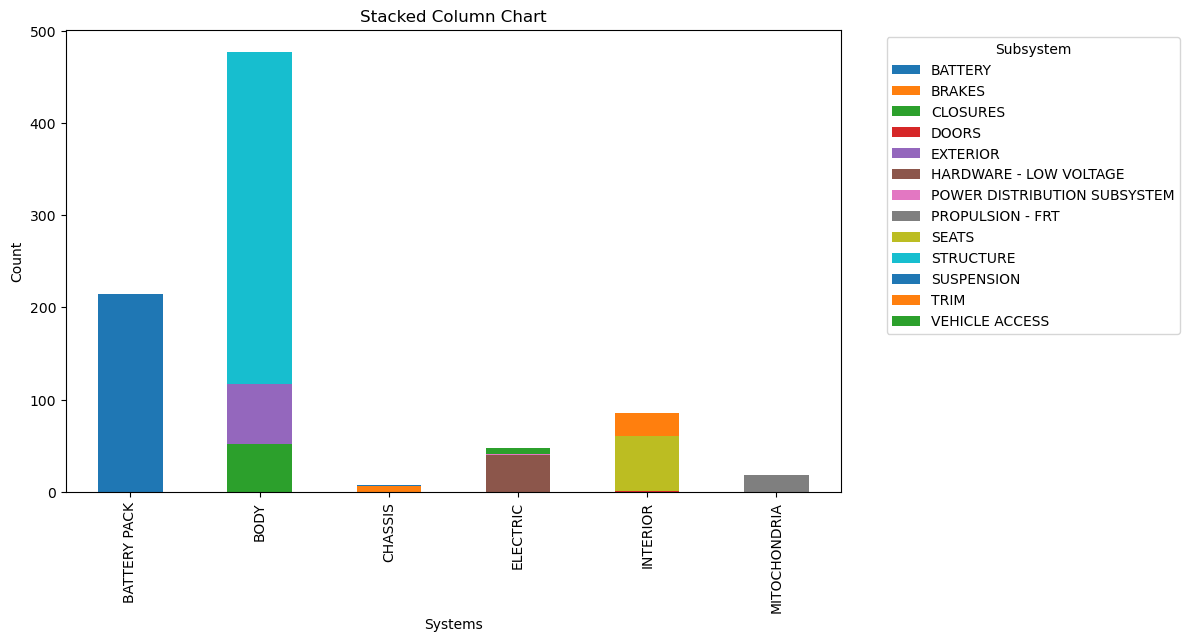

In [23]:
import pandas as pd
import matplotlib.pyplot as plt


# Group by 'systems' and 'subsystem' and count
grouped = wrong_rows_df.groupby(['System', 'Subsystem']).size().unstack(fill_value=0)

# Plot stacked bar chart
grouped.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('Systems')
plt.ylabel('Count')
plt.title('Stacked Column Chart')
plt.legend(title='Subsystem', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()



In [18]:
right_rows = []

for _, row in filtered_df.iterrows():
    procurement_code = row['Procurement Code']
    subcomponent_code = row['Sub Component Code']
    
    if procurement_code == 'Buy' and (subcomponent_code == 'DirectedBuy' or subcomponent_code == 'SupplierBuy'):
        right_rows.append(row)
    elif(not procurement_code == 'Make' and not procurement_code == 'Buy'):
        right_rows.append(row)
    
right_rows_df = pd.DataFrame(right_rows, columns=df.columns)

right_rows_df

,Level,Key,System,Subsystem,Part Number,Part Title,Parent,Responsible Engineer,Procurement Code,Sub Component Code,Variant
2715,8,EV00004608-SY00002272-SB00007686-GP00010894-CA...,BODY,STRUCTURE,PT00053561,CRUSH CAN ; LH ; QRV,PT00075766,Pheobe Buffay,Buy,DirectedBuy,
2716,8,EV00004608-SY00002272-SB00007686-GP00010894-CA...,BODY,STRUCTURE,PT00053556,CRUSH CAN ; RH ; QRV,PT00075766,Pheobe Buffay,Buy,DirectedBuy,
2717,8,EV00004608-SY00002272-SB00007686-GP00010894-CA...,BODY,STRUCTURE,PT00053563,REINF - CRUSH CAN ; UPR ; QRV,PT00075766,Pheobe Buffay,Buy,SupplierBuy,
2718,8,EV00004608-SY00002272-SB00007686-GP00010894-CA...,BODY,STRUCTURE,PT00084185,FRT_CC_REIN_PLATE,PT00075766,Pheobe Buffay,Buy,SupplierBuy,
2720,8,EV00004608-SY00002272-SB00007686-GP00010894-CA...,BODY,STRUCTURE,PT00075768,JOINING_CRUSH_CAN ; Grande,PT00075766,Pheobe Buffay,Phantom,NaN,
...,...,...,...,...,...,...,...,...,...,...,...
69319,11,EV00004608-SY00005795-SB00003830-GP00009740-SB...,BATTERY PACK,BATTERY,PT00051311,Motorboat Tail,PT00015975,Dawn Bellwether,Buy,SupplierBuy,"QRV: Battery{LMAO 5 Module,LMAO 190 Module}"
69321,11,EV00004608-SY00005795-SB00003830-GP00009740-SB...,BATTERY PACK,BATTERY,PT00051315,Sour Patch Gummies,PT00015983,Dawn Bellwether,Buy,SupplierBuy,"QRV: Battery{LMAO 5 Module,LMAO 190 Module}"
69323,11,EV00004608-SY00005795-SB00003830-GP00009740-SB...,BATTERY PACK,BATTERY,PT00051311,Motorboat Tail,PT00015975,Dawn Bellwether,Buy,SupplierBuy,"QRV: Battery{LMAO 5 Module,LMAO 190 Module}"
69325,11,EV00004608-SY00005795-SB00003830-GP00009740-SB...,BATTERY PACK,BATTERY,PT00051310,Charge Port BCA,PT00015978,Chief Bogo,Buy,DirectedBuy,"QRV: Battery{LMAO 5 Module,LMAO 190 Module}"


In [ ]:


# of the 3299 rows that fit this category, 2450 are correct



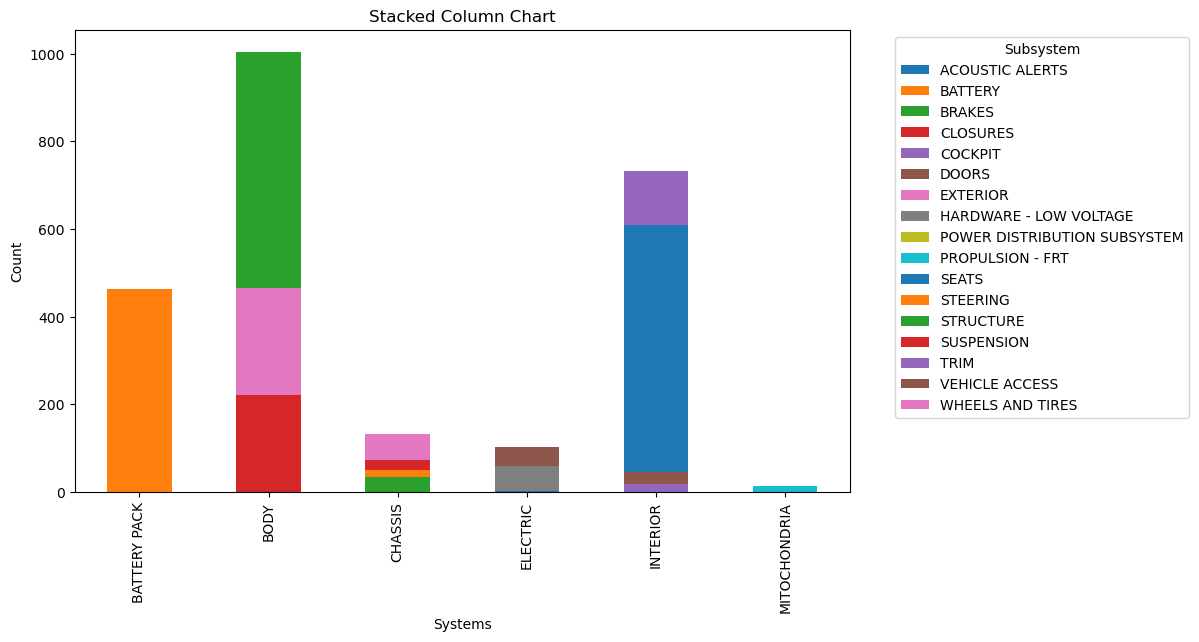

In [22]:
import pandas as pd
import matplotlib.pyplot as plt


# Group by 'systems' and 'subsystem' and count
grouped = right_rows_df.groupby(['System', 'Subsystem']).size().unstack(fill_value=0)

# Plot stacked bar chart
grouped.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('Systems')
plt.ylabel('Count')
plt.title('Stacked Column Chart')
plt.legend(title='Subsystem', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()



In [26]:
import pandas as pd

# Sample DataFrame

# Print counts of unique values in 'systems' column
wrong = (wrong_rows_df['Subsystem'].value_counts())


In [27]:
import pandas as pd

# Sample DataFrame

# Print counts of unique values in 'systems' column
right = (right_rows_df['Subsystem'].value_counts())


In [28]:
combined_series = wrong.add(right, fill_value=0).astype(int)

division_series = right.divide(combined_series, fill_value=0)

# Replace NaN values with 0
division_series = division_series.fillna(0)

# Print the division result
print(division_series)


ACOUSTIC ALERTS                 1.000000
BATTERY                         0.684366
BRAKES                          0.850000
CLOSURES                        0.809524
COCKPIT                         1.000000
DOORS                           0.965517
EXTERIOR                        0.790323
HARDWARE - LOW VOLTAGE          0.587629
POWER DISTRIBUTION SUBSYSTEM    0.500000
PROPULSION - FRT                0.437500
SEATS                           0.903692
STEERING                        1.000000
STRUCTURE                       0.599109
SUSPENSION                      0.958333
TRIM                            0.832215
VEHICLE ACCESS                  0.875000
WHEELS AND TIRES                1.000000
Name: Subsystem, dtype: float64


In [29]:
sorted_series = division_series.sort_values(ascending=False)

# Print the sorted Series
print(sorted_series)


ACOUSTIC ALERTS                 1.000000
COCKPIT                         1.000000
STEERING                        1.000000
WHEELS AND TIRES                1.000000
DOORS                           0.965517
SUSPENSION                      0.958333
SEATS                           0.903692
VEHICLE ACCESS                  0.875000
BRAKES                          0.850000
TRIM                            0.832215
CLOSURES                        0.809524
EXTERIOR                        0.790323
BATTERY                         0.684366
STRUCTURE                       0.599109
HARDWARE - LOW VOLTAGE          0.587629
POWER DISTRIBUTION SUBSYSTEM    0.500000
PROPULSION - FRT                0.437500
Name: Subsystem, dtype: float64


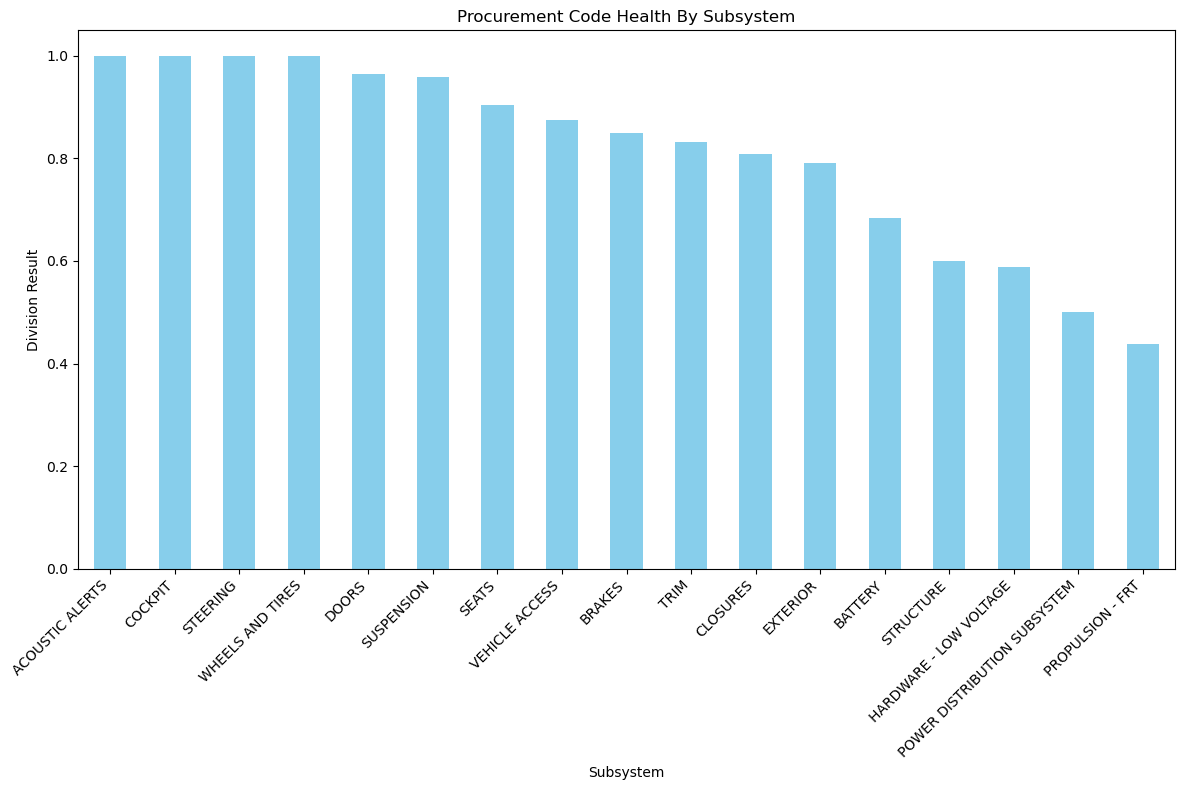

In [30]:
import matplotlib.pyplot as plt

# Sort the division result by values in descending order
sorted_series = division_series.sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 8))
sorted_series.plot(kind='bar', color='skyblue')
plt.xlabel('Subsystem')
plt.ylabel('Division Result')
plt.title('Procurement Code Health By Subsystem')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [31]:
words_to_search = ['Tall', 'tall']
column_to_search = 'Variant'

# Create a pattern to search for multiple words
pattern = '|'.join(words_to_search)

# Count occurrences of the words in the "Description" column
count = wrong_rows_df[column_to_search].str.contains(pattern, case=False, na=False).sum()


print(count)

words_to_search = ['Grande', 'grande']
column_to_search = 'Variant'

# Create a pattern to search for multiple words
pattern = '|'.join(words_to_search)

# Count occurrences of the words in the "Description" column
count = wrong_rows_df[column_to_search].str.contains(pattern, case=False, na=False).sum()


print(count)

words_to_search = ['Venti', 'venti']
column_to_search = 'Variant'

# Create a pattern to search for multiple words
pattern = '|'.join(words_to_search)

# Count occurrences of the words in the "Description" column
count = wrong_rows_df[column_to_search].str.contains(pattern, case=False, na=False).sum()


print(count)


203
308
235


In [32]:
words_to_search = ['Tall', 'tall']
column_to_search = 'Variant'

# Create a pattern to search for multiple words
pattern = '|'.join(words_to_search)

# Count occurrences of the words in the "Description" column
count = filtered_df[column_to_search].str.contains(pattern, case=False, na=False).sum()


print(count)

words_to_search = ['Grande', 'grande']
column_to_search = 'Variant'

# Create a pattern to search for multiple words
pattern = '|'.join(words_to_search)

# Count occurrences of the words in the "Description" column
count = filtered_df[column_to_search].str.contains(pattern, case=False, na=False).sum()


print(count)

words_to_search = ['Venti', 'venti']
column_to_search = 'Variant'

# Create a pattern to search for multiple words
pattern = '|'.join(words_to_search)

# Count occurrences of the words in the "Description" column
count = filtered_df[column_to_search].str.contains(pattern, case=False, na=False).sum()


print(count)


964
1276
1057


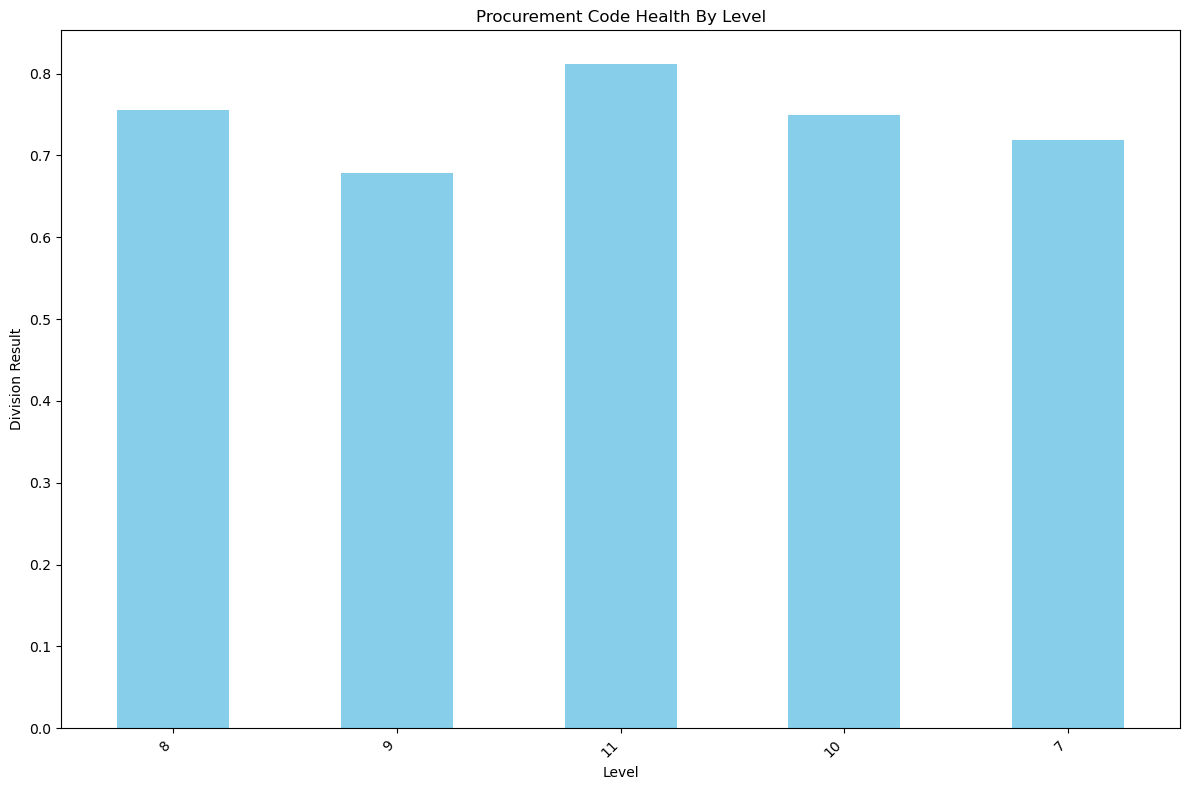

In [33]:


# of the 3299 rows that fit this category, 2450 are correct


# sort by level, insert into tree, 


# find if some rows don't have existing parents


import pandas as pd

# Sample DataFrame

# Print counts of unique values in 'systems' column
total = filtered_df['Level'].value_counts().sort_index()

import pandas as pd

# Sample DataFrame

# Print counts of unique values in 'systems' column
wrong = wrong_rows_df['Level'].value_counts().sort_index()

import pandas as pd

# Sample DataFrame

# Print counts of unique values in 'systems' column
right = right_rows_df['Level'].value_counts()

import pandas as pd

# Sample DataFrame

# Print counts of unique values in 'systems' column
wrong = wrong_rows_df['Level'].value_counts()

combined_series = wrong.add(right, fill_value=0).astype(int)

division_series = right.divide(combined_series, fill_value=0)

# Replace NaN values with 0
division_series = division_series.fillna(0)

# Print the division result

sorted_series = division_series

# Print the sorted Series

import matplotlib.pyplot as plt

# Sort the division result by values in descending order
sorted_series = division_series

# Create the bar plot
plt.figure(figsize=(12, 8))
sorted_series.plot(kind='bar', color='skyblue')
plt.xlabel('Level')
plt.ylabel('Division Result')
plt.title('Procurement Code Health By Level')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
